# Austin Airbnb Data Wrangling

A notebook that analyzes the AirBnB Data for Austin, following the CRISP-DM process as part of the Data Science Nanodegree at Udacity.

### Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer,LabelEncoder,OneHotEncoder,StandardScaler 


In [5]:
#Read review, listing and calendar data
listing = pd.read_csv(r'C:\Users\pdngu\Desktop\Udacity\Project 1 - Airbnb Blog\listings.csv')
calendar = pd.read_csv(r'C:\Users\pdngu\Desktop\Udacity\Project 1 - Airbnb Blog\calendar.csv')
reviews = pd.read_csv(r'C:\Users\pdngu\Desktop\Udacity\Project 1 - Airbnb Blog\reviews.csv')

### CRISP-DM

To grasp the general AirBnB business insights, the public Austin AirBnB data will be analyzed adhering the CRISP-DM.
1. Business Understanding
2. Data Understanding
3. Prepare Data
4. Data Modeling
5. Evaluate The Results
6. Deploy

### 1. Business Understanding

Business Questions

- How are prices changed seasonally in Austin?
- What is the most popular amenities in Austin Airbnb?
- What types of rental property more likely to make profit in Austin?

### 2. Data Understanding
Checking the data shapes as well as data types to grasp a feeling of how the dataset looks like

In [6]:
print("Listing",'\n', listing.head(5))
print("Calendar",'\n', calendar.head(5))
print("Reviews",'\n', reviews.head(5))

Listing 
      id                        listing_url       scrape_id last_scraped  \
0  2265  https://www.airbnb.com/rooms/2265  20200917153321   2020-09-18   
1  5245  https://www.airbnb.com/rooms/5245  20200917153321   2020-09-18   
2  5456  https://www.airbnb.com/rooms/5456  20200917153321   2020-09-18   
3  5636  https://www.airbnb.com/rooms/5636  20200917153321   2020-09-18   
4  5769  https://www.airbnb.com/rooms/5769  20200917153321   2020-09-18   

                                                name  \
0   Zen-East in the Heart of Austin (monthly rental)   
1  Eco friendly, Colorful, Clean, Cozy monthly share   
2          Walk to 6th, Rainey St and Convention Ctr   
3         Soco, Barton Springs Private Guest Cottage   
4                                     NW Austin Room   

                                         description  \
0  Zen East is situated in a vibrant & diverse mu...   
1  Situated in a vibrant & diverse multicultural ...   
2  Great central  location for wal

In [7]:
print(listing.shape, calendar.shape, reviews.shape)

(10436, 74) (3809331, 7) (317653, 6)


In [8]:
print(listing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10436 entries, 0 to 10435
Data columns (total 74 columns):
id                                              10436 non-null int64
listing_url                                     10436 non-null object
scrape_id                                       10436 non-null int64
last_scraped                                    10436 non-null object
name                                            10436 non-null object
description                                     10245 non-null object
neighborhood_overview                           6653 non-null object
picture_url                                     10435 non-null object
host_id                                         10436 non-null int64
host_url                                        10436 non-null object
host_name                                       10433 non-null object
host_since                                      10433 non-null object
host_location                                   10413 n

In [28]:
missing_perct.values

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.83020314e-02, 3.62495209e-01, 9.58221541e-05,
       0.00000000e+00, 0.00000000e+00, 2.87466462e-04, 2.87466462e-04,
       2.20390954e-03, 3.83384438e-01, 3.98428517e-01, 3.98428517e-01,
       2.88903795e-01, 2.87466462e-04, 2.87466462e-04, 2.87466462e-04,
       1.92794174e-01, 2.87466462e-04, 2.87466462e-04, 0.00000000e+00,
       2.87466462e-04, 2.87466462e-04, 3.62495209e-01, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.43733231e-03,
       6.23802223e-02, 4.88692986e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [72]:
#Checking missing values in dataset
df_missing = listing.isna().sum()
missing_perct = (df_missing * 100 / len(listing)).sort_values(ascending = False)
df_missing_perct = pd.DataFrame({"attribute" : missing_perct.index, "Percentage" : missing_perct.values})
#df_missing_perct = pd.DataFrame(data = missing_perct)
df_missing_perct.set_index("attribute", inplace = True)
print(df_missing_perct.head())

                              Percentage
attribute                               
bathrooms                     100.000000
license                       100.000000
neighbourhood_group_cleansed  100.000000
calendar_updated              100.000000
host_response_time             39.842852


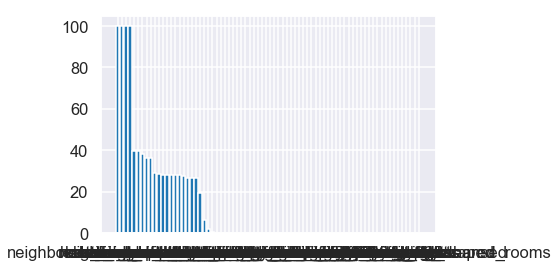

In [75]:
plt.bar(df_missing_perct.index, df_missing_perct.Percentage)
plt.show()

                              Percentage
attribute                               
bathrooms                     100.000000
license                       100.000000
neighbourhood_group_cleansed  100.000000
calendar_updated              100.000000
host_response_time             39.842852


C:\Users\pdngu\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

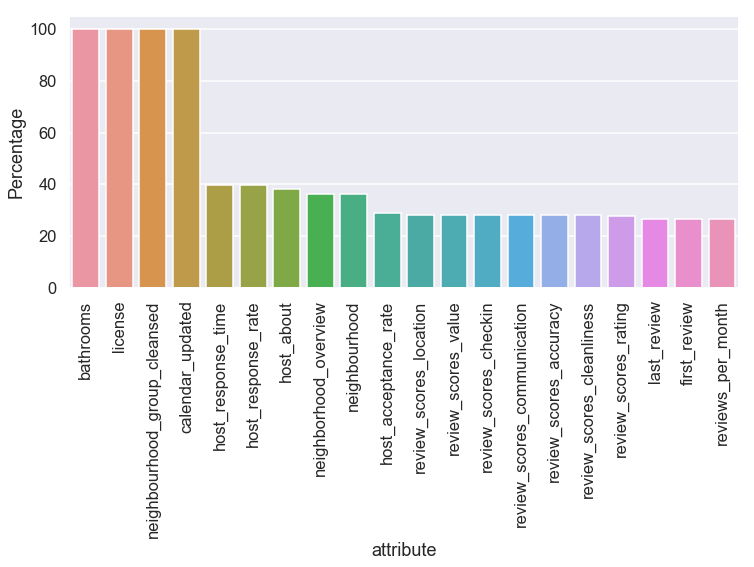

In [81]:
#Checking missing values in dataset
df_missing = listing.isna().sum()
missing_perct = (df_missing * 100 / len(listing)).sort_values(ascending = False)
df_missing_perct = pd.DataFrame({"attribute" : missing_perct.index, "Percentage" : missing_perct.values}).head(20)
df_missing_perct.set_index("attribute", inplace = True)
print(df_missing_perct.head())

#df_missing_perct = pd.DataFrame(data = missing_perct)
#print(df_missing_perct[:10])

sns.set_style("darkgrid")
sns.set_context("talk")
figure, axes = plt.subplots(figsize = (12,5))
ax = sns.barplot(df_missing_perct.index, df_missing_perct.Percentage)
plt.xticks(rotation = 90)

#plt.bar(x, y)
#plt.show()

In [90]:
#Columns that have more than 50% missing values

missing_50 = df_missing_perct[df_missing_perct['Percentage'] > 50].index
print(missing_50)

listing.drop(labels = missing_50, axis = 1, inplace = True)

Index(['bathrooms', 'license', 'neighbourhood_group_cleansed',
       'calendar_updated'],
      dtype='object', name='attribute')


- Depends on the types of problem, the rest of missing values will be later processed in sections

### 3. Prepare Data

In this section, I will prepare data into the appropriate format to specifically answer the question

## Question 1: How do Airbnb in Austin observe seasonal price changes

In [92]:
#Check missing values in targeted columns
print(calendar.isnull().sum())
print(calendar.dtypes)

listing_id          0
date                0
available           0
price               0
adjusted_price      0
minimum_nights    118
maximum_nights    118
dtype: int64
listing_id          int64
date               object
available          object
price              object
adjusted_price     object
minimum_nights    float64
maximum_nights    float64
dtype: object


In [93]:
#Converting data into time format
def convert_calendar(df_calendar):
    # Split date column into year, month and day columns
    # Input: Dataframe
    # Output: Dataframe with processed time column
    df_calendar['day'] = pd.DatetimeIndex(df_calendar['date']).day
    df_calendar['month'] = pd.DatetimeIndex(df_calendar['date']).month
    df_calendar['year'] = pd.DatetimeIndex(df_calendar['date']).year

    return df_calendar

def convert_price(df):
    #Remove $ sign, convert the price into numerical format
    #Input: DataFrame
    #Output: Processed price column in the right format
    
    
    df['price'] = df['price'].str.replace(',','')
    df['price'] = df['price'].str.replace('$','')
    df['price'] = df['price'].astype(float)
    
    return df



In [94]:
calendar_fixed = convert_calendar(calendar)
calendar_fixed = convert_price(calendar_fixed)

In [95]:
calendar_fixed.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,day,month,year
0,271052,2020-09-18,t,350.0,$350.00,3.0,365.0,18,9,2020
1,277028,2020-09-18,t,799.0,$799.00,2.0,30.0,18,9,2020
2,277028,2020-09-19,t,799.0,$799.00,2.0,30.0,19,9,2020
3,277028,2020-09-20,t,799.0,$799.00,2.0,30.0,20,9,2020
4,277028,2020-09-21,t,399.0,$399.00,2.0,30.0,21,9,2020


In [97]:
#Checking missing values
calendar_fixed.isnull().sum()

listing_id          0
date                0
available           0
price               0
adjusted_price      0
minimum_nights    118
maximum_nights    118
day                 0
month               0
year                0
dtype: int64

- The data is well completed with missing values fell into columns that will not be used to answer this question.

In [35]:
print(calendar.dtypes)

listing_id          int64
date               object
available          object
price             float64
adjusted_price     object
minimum_nights    float64
maximum_nights    float64
day                 int64
month               int64
year                int64
dtype: object


In [36]:
#Grouping the data into months and taking the average price
calendar_month = calendar_fixed.groupby(['month'], as_index = False)['price'].mean()

In [37]:
calendar_month.set_index('month')

,price
month,
1,285.988681
2,303.644640
3,334.778864
4,331.222113
5,344.460228
6,356.355491
7,384.740331
8,382.414505
9,334.540720


Text(0.5, 1.0, 'Airbnb Austin Average Monthly Prices')

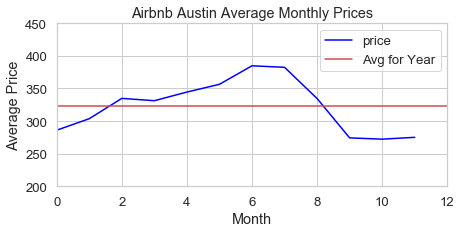

In [38]:
sns.set(style = 'whitegrid', font_scale = 1.2)
calendar_month['price'].plot(figsize = (7,3), linewidth = 1.5, color = 'blue')
plt.xlim(0,12)
plt.ylim(200, 450)
plt.axhline(calendar_month['price'].mean(),color='r',label='Avg for Year')
plt.legend()
plt.ylabel('Average Price')
plt.xlabel('Month')
plt.title('Airbnb Austin Average Monthly Prices')

### Answer for Question 1: How do Airbnb accommodation prices monthly change to observe season impact on price?

According to the figure:
> We can clearly see the 3 groups of Airbnb pricing during the year in Austin:
1. The highest peak happens during the summer from around May to August
2. The medium price starts to pick up from end of Winter all the way to end of Spring
3. The lowest peak is during the Fall into the Winter

- One explaination for the summer peak could be the increasing number of visitors coming to Austin to enjoy its beautiful outdoor nature activities.
- Austin can get really cold during the Winter. Lakes, kayak, outdoor pools are less desirable activities during this time of the year.

### Question 2: What is the most popular amentities in Austin Airbnb Listing data?

In [98]:
print(listing.amenities[1])

["Hot water", "Luggage dropoff allowed", "Cable TV", "Free street parking", "TV", "Hair dryer", "Shampoo", "Heating", "Free parking on premises", "Essentials", "Iron", "Dryer", "Washer", "Carbon monoxide alarm", "Air conditioning", "Kitchen", "Hangers", "Lock on bedroom door", "Smoke alarm", "Laptop-friendly workspace", "Breakfast", "Wifi"]


In [106]:
print(listing.amenities.isnull().sum())

0


In [99]:
#Re-formatting the amentities column
amt = listing['amenities'].apply(lambda x: [amenity.replace('"', "").replace("{", "")
                                            .replace("}", "").replace("[", "")
                                            .replace("]", "") for amenity in x.split(",")])

In [100]:
print(amt.head())

0    [Dishwasher,  Hot water,  Microwave,  Cable TV...
1    [Hot water,  Luggage dropoff allowed,  Cable T...
2    [Hot water,  Microwave,  Luggage dropoff allow...
3    [Heating,  Hangers,  Shampoo,  Essentials,  Sm...
4    [Heating,  Hot water,  Shampoo,  Essentials,  ...
Name: amenities, dtype: object


In [42]:
#The numbers of records having amenities
amt.count()

10436

In [43]:
#Transform the amenities dataset into dummies

mlb = MultiLabelBinarizer()
label_amt = pd.DataFrame(mlb.fit_transform(amt), columns = mlb.classes_, index = amt.index)

In [44]:
#Summary of Amenities Table in terms of items per index
label_amt.head()

,,Air conditioning,Air hockey table,Apple TV,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,Baking sheet,Balcony,...,Pool table,Private entrance,Rice Maker,Shampoo,Smart TV,Smart lock,Smoke alarm,Stair gates,TV,Washer
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
amt_count = label_amt.sum().sort_values(ascending = False)

In [46]:
amt_count.head(20)

 Wifi                         10096
 Air conditioning              9736
 Smoke alarm                   9650
 Kitchen                       9538
 Essentials                    9403
 TV                            8895
 Washer                        8488
 Dryer                         8455
 Free parking on premises      8357
 Shampoo                       8106
 Hangers                       7972
 Hair dryer                    7649
 Iron                          7544
 Laptop-friendly workspace     7241
 Carbon monoxide alarm         7206
 Fire extinguisher             6882
 Heating                       5965
 Coffee maker                  5694
 Dishes and silverware         5659
 Refrigerator                  5651
dtype: int64

In [47]:
amt_count_table = pd.DataFrame({'Amenity': amt_count.index, 'Count': amt_count.values})
amt_count_table.head(5)

,Amenity,Count
0,Wifi,10096
1,Air conditioning,9736
2,Smoke alarm,9650
3,Kitchen,9538
4,Essentials,9403


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

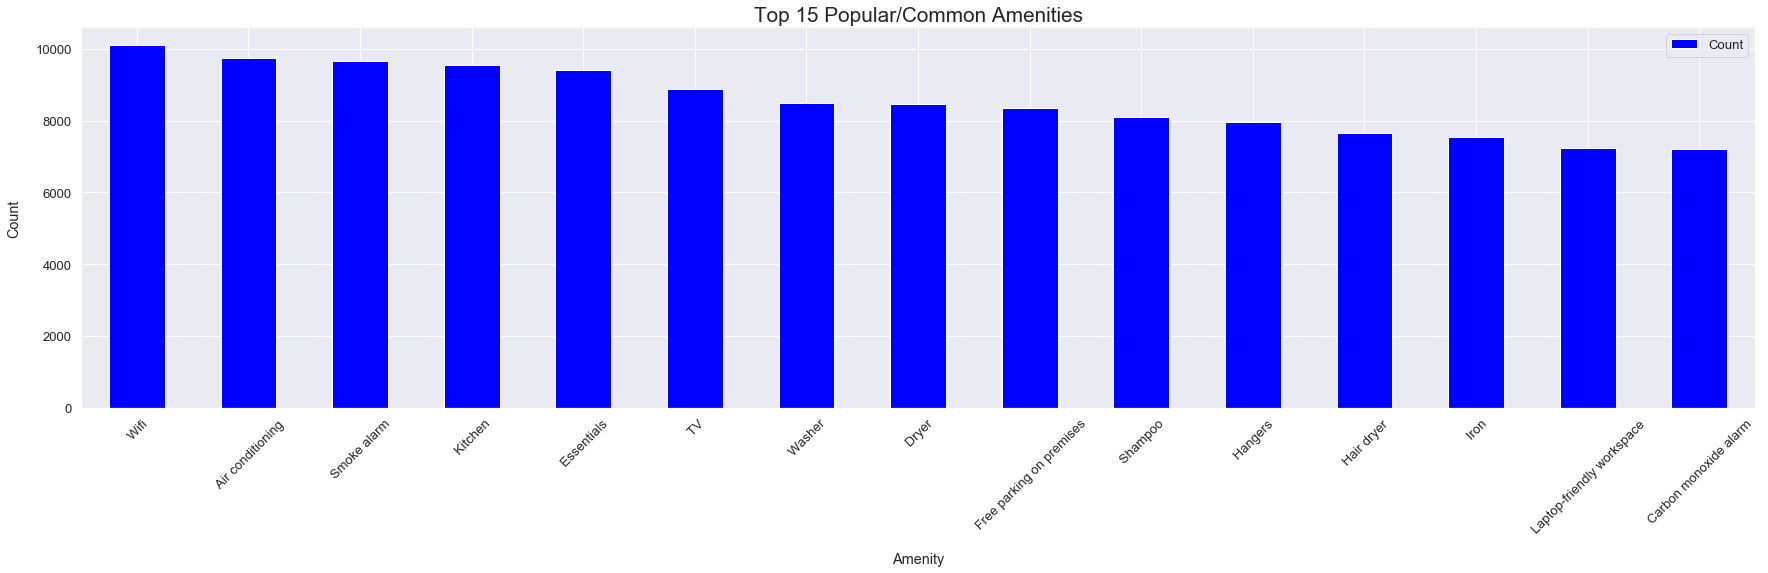

In [48]:
#Plot the counting of amenities
sns.set(font_scale = 1.2)
amt_count_table.head(15).plot(x = 'Amenity', y='Count', kind = 'bar', 
                              figsize = (30,7), rot = 0, color = 'Blue')

plt.xlabel("Amenity", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title("Top 15 Popular/Common Amenities", fontsize='x-large')
plt.xticks(rotation=45)

### Answer to question 2:

- Besides essential equipments, I figured that Wifi, Air Conditioning, TV, Washer, Dryer are the top 5 amenities in Austin Airbnb listings
- Depends on the customer groups we are targeting, the data can be further divided into (high end, medium end) or (super-host or not) by grouping the prices and look and the amenities for each of these specific groups. 

In [49]:
calendar.date.head(5)

0    2020-09-18
1    2020-09-18
2    2020-09-19
3    2020-09-20
4    2020-09-21
Name: date, dtype: object

## Answer for question 3: What types of rental property more likely to make profit in Austin?

In [107]:
listing = convert_price(listing)

In [108]:
#Creating revenue dataframe
data_revenue = listing.groupby('id').agg({'price':'mean'})
data_revenue.rename(index=str, columns={"price": "avg_price"},inplace=True)
data_revenue['id'] = data_revenue.index.astype('int64')
data_revenue.set_index('id', inplace = True)
data_revenue = pd.DataFrame(data_revenue.merge(listing, on = 'id', how = 'left'))

In [109]:
#Dropping duplicates from revenue dataset

data_revenue = data_revenue.drop_duplicates()
data_revenue = data_revenue[data_revenue['number_of_reviews'] <= 365]

In [110]:
data_revenue.shape

(10363, 71)

In [111]:
data_revenue.columns

Index(['id', 'avg_price', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'avail

In [121]:
#Checking missing values
print("Missing values in price column: ", data_revenue.price.isnull().sum())

print("Missing values in number of reviews column: ", data_revenue.number_of_reviews.isnull().sum())

print("Missing values in property types column: ", data_revenue.property_type.isnull().sum())


Missing values in price column:  0
Missing values in number of reviews column:  0
Missing values in property types column:  0


In [57]:
# I need to define what is profitable and what is not. So, I have to come up with a metric like revenue or number of times 
# a listing was booked to measure profitability. 
# calculate revenue metric: price of each listing times the number of nigths each listing is booked.
# I assumed that the number of times each listing is booked is same as the numer of reviews each guest wrote for that listing

data_revenue['revenue'] = data_revenue['minimum_nights'] * data_revenue['avg_price'] * data_revenue['number_of_reviews']
data_revenue = data_revenue[data_revenue['revenue'] > 0]

Text(0.5, 1.0, 'Average Revenue vs. Price for Austin Airbnb Property Types')

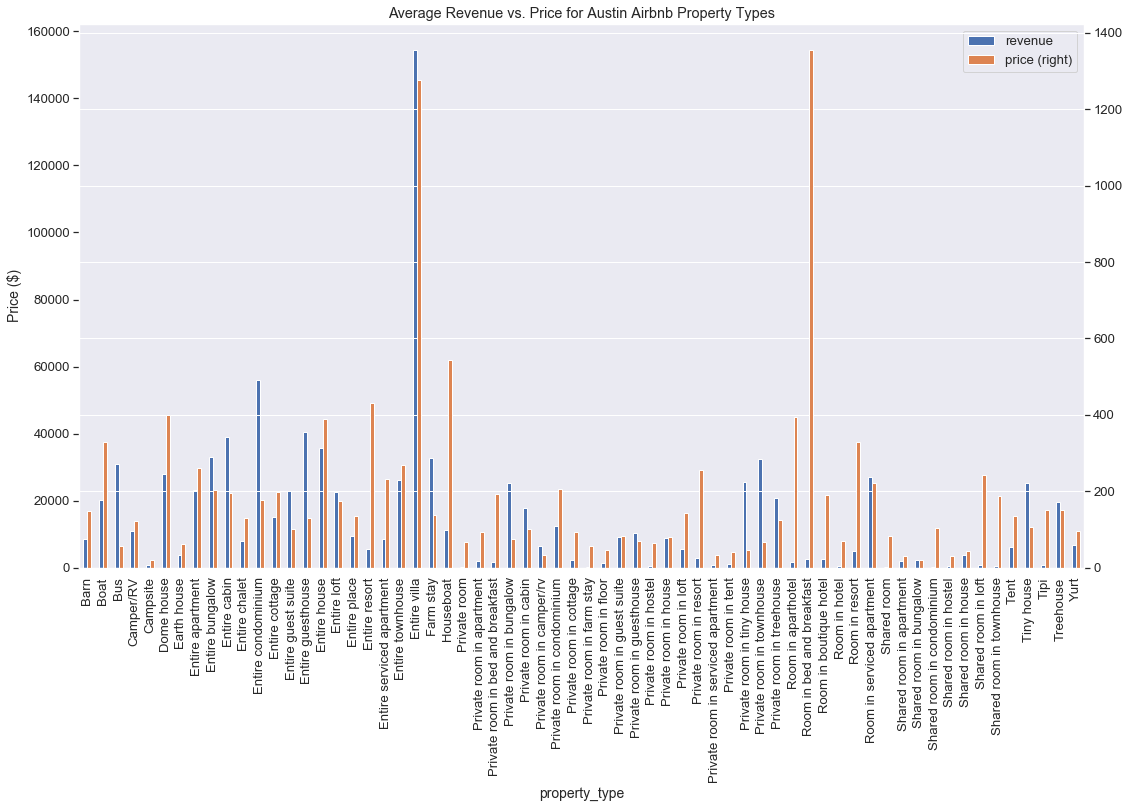

In [58]:
### plot revenue vs property and room type 
price_vs_revenue = data_revenue.groupby(['property_type']).agg({'revenue':'mean','price':'mean'})
#price_vs_revenue.rename(index=str, columns={"listing_id": "number_of_listings"},inplace=True)
fig, ax = plt.subplots(figsize=(18,10))
price_vs_revenue.plot.bar(y=['revenue','price'], secondary_y='price', ax=ax)
ax.set_xlabel("property_type",fontsize=14)
ax.set_ylabel("Price ($)",fontsize=14)
plt.title('Average Revenue vs. Price for Austin Airbnb Property Types')

### Answer for question 3: What types of rental property more likely to make profit in Austin?

- We can clearly see the patterns that hosts of private spaces generate more revenue than their average prices, such as entire condo, entire townhouse, treehouse, bus, etc...
- Shared rooms for the most parts have higher average price compared to the revenue they are generated.
- This tells us the customers/guests in Austin prefer entire place staying to shared bedrooms.
